**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

# # Análisis Exploratorio de Datos
## Dataset: sparkvista_dataset
### Integrantes:

#### Andrea Carolina Garza Nacif A01280427
#### Jhamyr Arnulfo Alcalde Oballe A01795409
#### Víctor Arista Beltrán A01012223

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Importar dataset

In [ ]:
df = pd.read_excel(
    '/content/drive/MyDrive/Colab Notebooks/sparkvista_dataset.xlsx',
    sheet_name='dataset_unificado',
)

In [ ]:

#Tasas de cambio aproximadas (actualízalas según la fecha)
tipo_cambio = {
    'USD': 1.0,
    'GBP': 1.25,   # £
    'EUR': 1.10,   # €
    'INR': 0.012,  # ₹
    'JPY': 0.0072, # ¥
    'CNY': 0.15,   # CN¥
    'MXN': 0.055,  # MXN
    'CAD': 0.75,   # CAD$
    'DKK': 0.15,   # DKK
    'SEK': 0.10,   # SEK
    'CHF': 1.10,   # CHF
    'AUD': 0.65,   # AUD
}

# Mapeo de símbolos/códigos a nuestro diccionario
simbolo2code = {
    '£': 'GBP',
    '€': 'EUR',
    '₹': 'INR',
    '¥': 'JPY',
    'CN¥':'CNY',
    '$':  'USD',
}

def parse_and_convert(cadena):
    """
    Devuelve el valor en USD como float.
    """
    if pd.isna(cadena):
        return np.nan

    s = cadena.strip()
    # Detecta código ISO si está al inicio
    m_code = re.match(r'^(MXN|CAD|DKK|SEK|CHF|AUD|CNY)\b', s)
    if m_code:
        code = m_code.group(1)
    else:
        # Detecta símbolo si está al inicio
        if s[0] in simbolo2code:
            code = simbolo2code[s[0]]
        else:
            # fallback a USD
            code = 'USD'

    # Extraer número y unidad
    m_num = re.search(r'([\d\.,]+)\s*(billion|million|trillion|B|M|T|k|K)?', s, flags=re.IGNORECASE)
    if not m_num:
        return np.nan

    num_str, unidad = m_num.groups()
    # eliminar comas
    num = float(num_str.replace(',', ''))
    unidad = (unidad or '').lower()

    # Escalar
    if unidad in ('trillion', 't'):
        num *= 1e12
    elif unidad in ('billion', 'b'):
        num *= 1e9
    elif unidad in ('million', 'm'):
        num *= 1e6
    elif unidad in ('k',):
        num *= 1e3

    # Convertir a USD
    tasa = tipo_cambio.get(code, np.nan)
    return num * tasa

# 6) Aplicarlo al DataFrame
df['Total Funding Amount (USD)'] = df['Total Funding Amount (National Currency)']\
    .astype(str)\
    .apply(parse_and_convert)

# 7) Verificar
print("Nulos tras conversión:", df['Total Funding Amount (USD)'].isnull().sum())
print(df[['Total Funding Amount (National Currency)', 'Total Funding Amount (USD)']].head(10))


Nulos tras conversión: 385
  Total Funding Amount (National Currency)  Total Funding Amount (USD)
0                            £10.6 million                  13250000.0
1                              ₹40 billion                 480000000.0
2                                      NaN                         NaN
3                                      NaN                         NaN
4                                      NaN                         NaN
5                                      NaN                         NaN
6                                      NaN                         NaN
7                                      NaN                         NaN
8                                      NaN                         NaN
9                                      NaN                         NaN


# Mostramos las primeras filas del dataset


In [ ]:
df.head()

,Megatrend,Area,Firm,Short Description,Keywords,Role of Utility,Website,Twitter Handle,Country,Language,Year Founded,Funding Status,Total Funding Amount (National Currency),Currency,Total Funding Amount (USD),IPO Date
0,Other,Energy Storage,Aceleron,"Develops serviceable, upgradeable, and recycla...","Battery, Circular Economy",NaN,aceleronenergy.com,NaN,United Kingdom,English,2016,Private,£10.6 million,USD,13250000.0,NaN
1,Clean Energy,Renewable Energy,ACME Group,Indian renewable energy company focusing on so...,"Solar, Wind, Green Hydrogen",NaN,acme.in,NaN,India,English,2003,Private,₹40 billion,USD,480000000.0,NaN
2,Other,Electric Mobility,Adaptive City Mobility,Developed lightweight electric vehicles with s...,"Electric Vehicles, Urban Mobility",NaN,NaN,NaN,Germany,German,2013,Insolvent,NaN,USD,NaN,NaN
3,Other,Battery Technology,Addionics,Israeli startup redesigning battery architectu...,"Battery, 3D Electrodes",NaN,addionics.com,NaN,Israel,English,2017,Private,NaN,USD,NaN,NaN
4,Other,Recycling Technology,Agilyx,Develops advanced recycling technologies to co...,"Recycling, Plastics",NaN,agilyx.com,@agilyx,United States,English,2004,Private,NaN,USD,NaN,NaN


In [ ]:
#Aseguramos que Year Founded sea string
df['Year Founded'] = df['Year Founded'].astype(str)

# Extrae el primer año de cuatro dígitos que aparezca en la cadena
df['Year Founded'] = df['Year Founded'].str.extract(r'(\d{4})')

# Convierte a numérico (coerce convierte lo que no matchee a NaN)
df['Year Founded'] = pd.to_numeric(df['Year Founded'], errors='coerce')

# Descartamos años absurdos
df.loc[(df['Year Founded'] < 1800) | (df['Year Founded'] > 2025), 'Year Founded'] = np.nan

# Si quieres, redondea al entero
df['Year Founded'] = df['Year Founded'].astype('Int64')  # nullable integer


# Estructura de los datos

In [ ]:
print("Dimensiones:", df.shape)

Dimensiones: (651, 16)


In [ ]:
print("\nTipos de datos:\n", df.dtypes)


Tipos de datos:
 Megatrend                                    object
Area                                         object
Firm                                         object
Short Description                            object
Keywords                                     object
Role of Utility                              object
Website                                      object
Twitter Handle                               object
Country                                      object
Language                                     object
Year Founded                                  Int64
Funding Status                               object
Total Funding Amount (National Currency)     object
Currency                                     object
Total Funding Amount (USD)                  float64
IPO Date                                     object
dtype: object


In [ ]:
print("\nConteo de nulos por columna:\n", df.isnull().sum())


Conteo de nulos por columna:
 Megatrend                                     0
Area                                          0
Firm                                          0
Short Description                             1
Keywords                                    178
Role of Utility                             575
Website                                      86
Twitter Handle                              306
Country                                      27
Language                                     15
Year Founded                                 35
Funding Status                              235
Total Funding Amount (National Currency)    384
Currency                                      0
Total Funding Amount (USD)                  385
IPO Date                                    607
dtype: int64


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Megatrend,651,16,Other,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,651,364,AI,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Firm,651,651,Faraday,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Description,650,650,‘plug and play’ devices that dynamically balan...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Keywords,473,450,"Comfort market, energy services",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role of Utility,76,16,Supplier,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Website,565,552,orsted.com,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Twitter Handle,345,338,@Orsted,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,624,98,USA,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Language,636,18,English,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Análisis univariante

In [ ]:
num_vars = df.select_dtypes(include=['number']).columns.tolist()
cat_vars = df.select_dtypes(include=['object']).columns.tolist()
print("Variables numéricas:", num_vars)
print("Variables categóricas:", cat_vars)

Variables numéricas: ['Year Founded', 'Total Funding Amount (USD)']
Variables categóricas: ['Megatrend', 'Area', 'Firm', 'Short Description', 'Keywords', 'Role of Utility', 'Website', 'Twitter Handle', 'Country', 'Language', 'Funding Status', 'Total Funding Amount (National Currency)', 'Currency', 'IPO Date']


# Graficamos

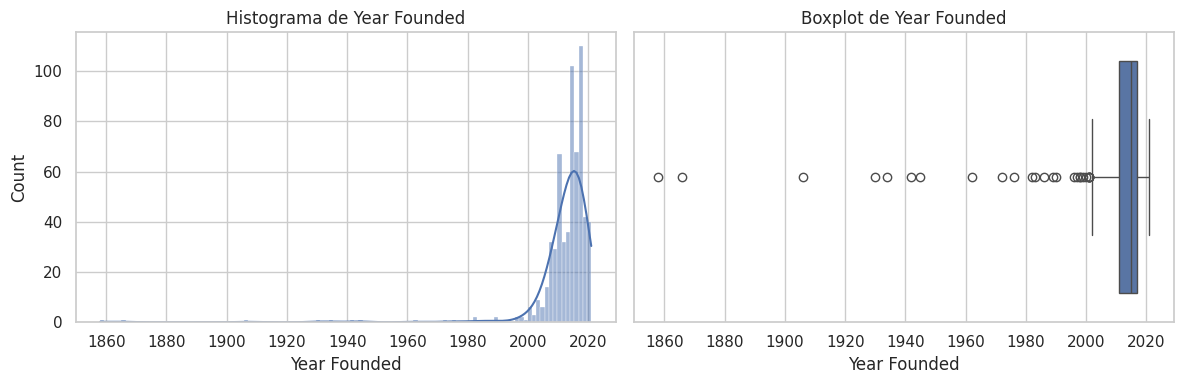

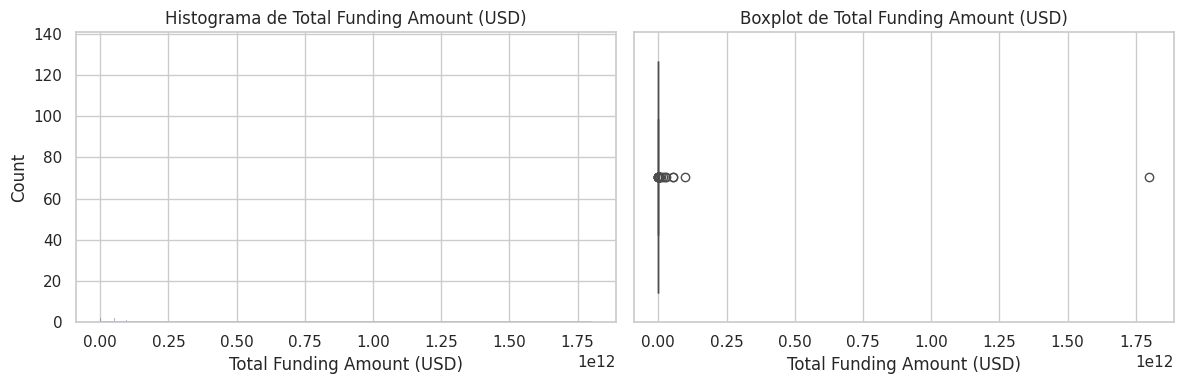

In [ ]:
# Histogramas y boxplots para variables numéricas
for var in num_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[var].dropna(), ax=axes[0], kde=True)
    axes[0].set_title(f"Histograma de {var}")
    sns.boxplot(x=df[var], ax=axes[1])
    axes[1].set_title(f"Boxplot de {var}")
    plt.tight_layout()
    plt.show()

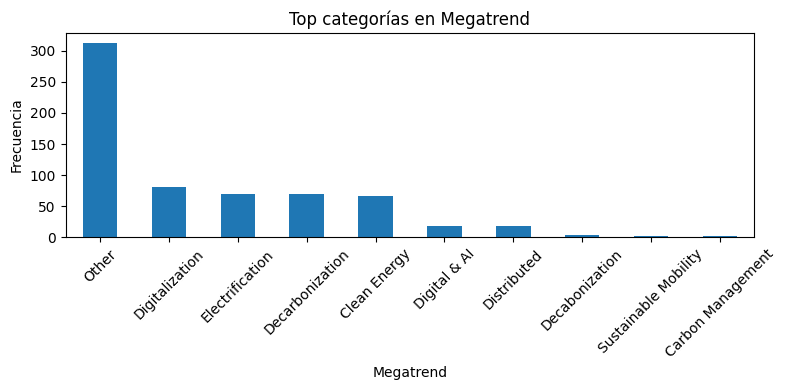

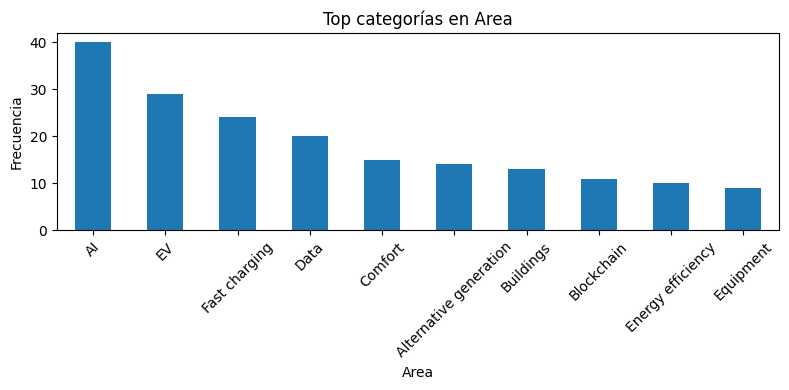

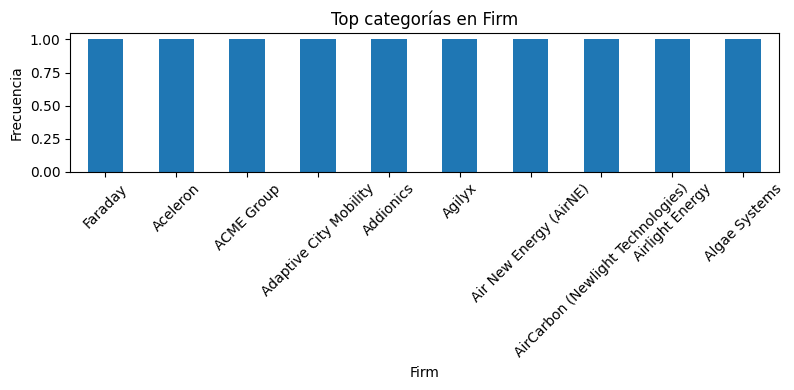

<ipython-input-142-81f510f4181b>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


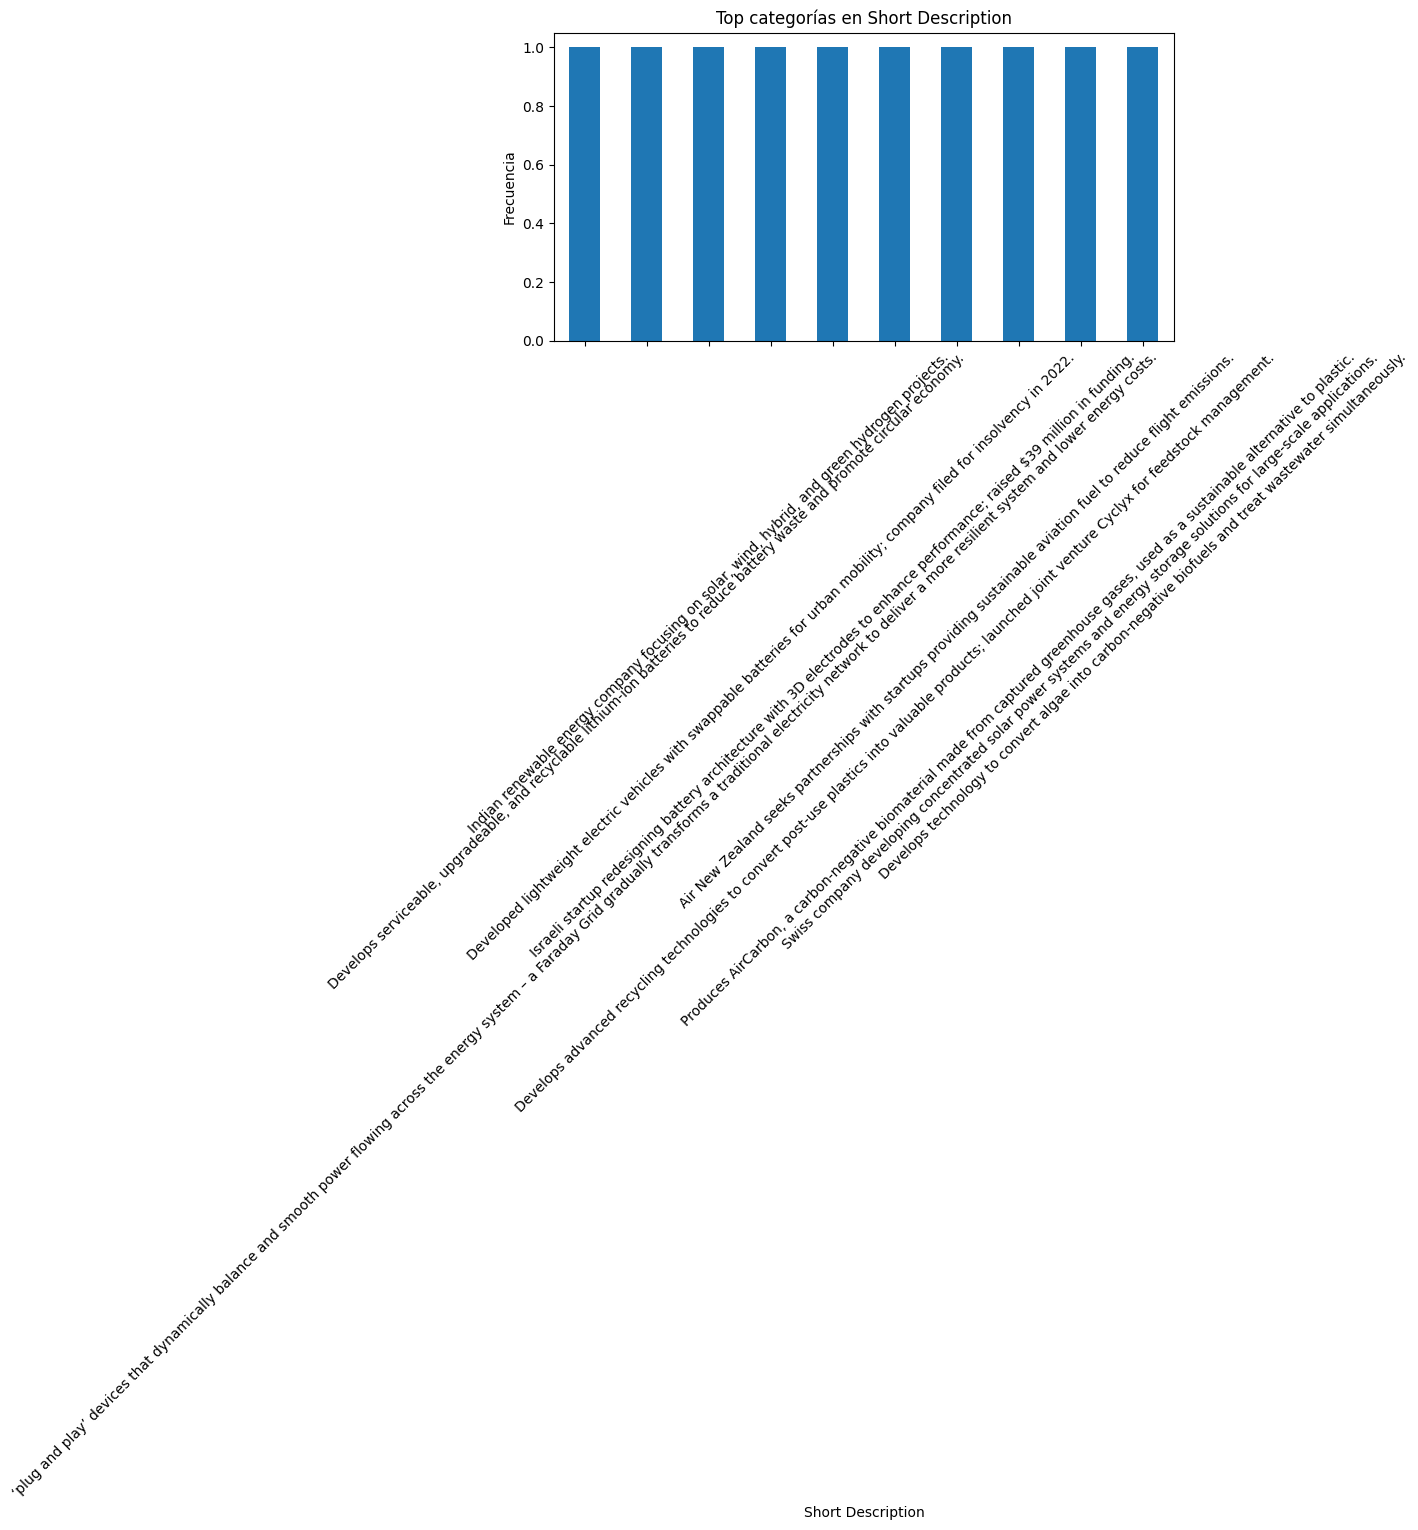

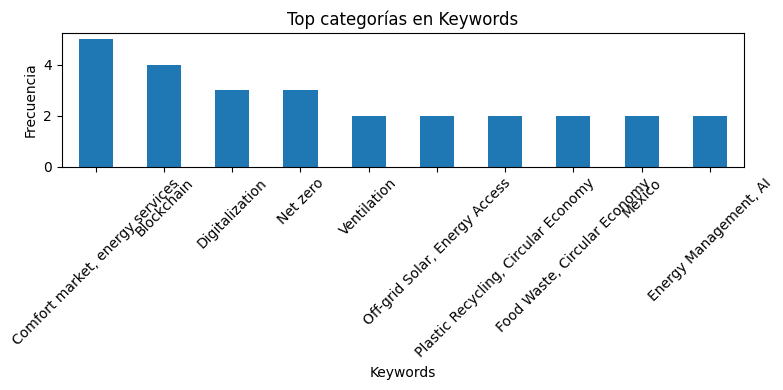

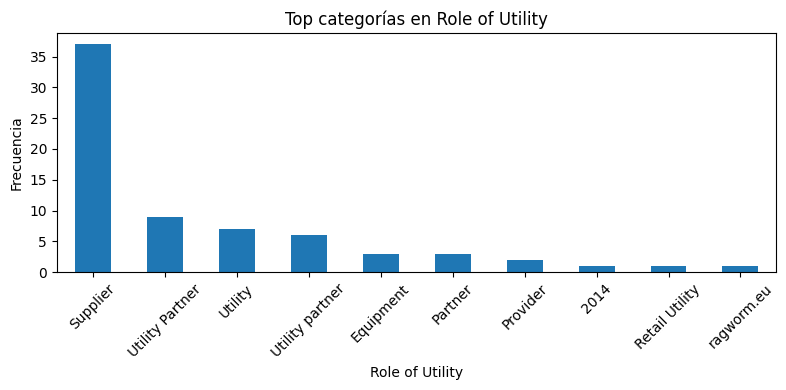

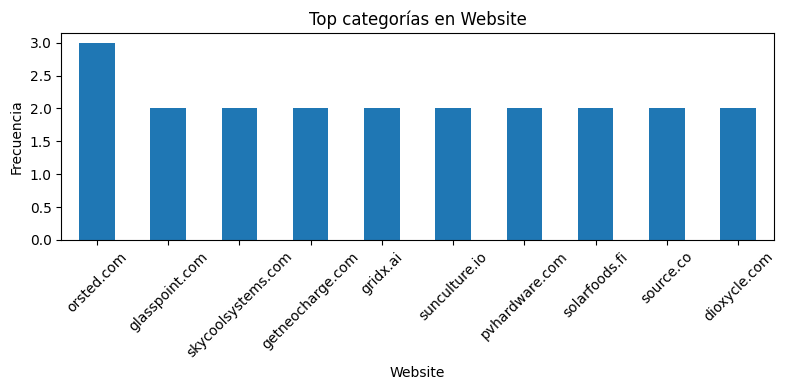

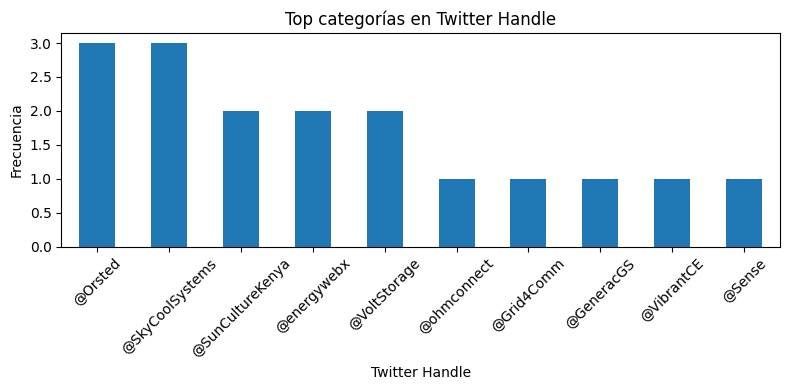

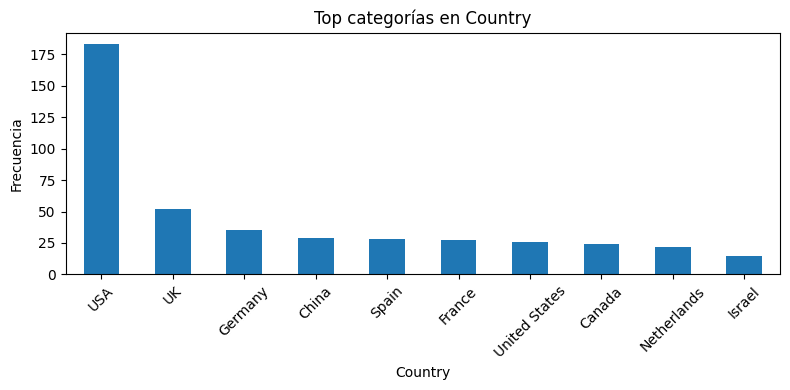

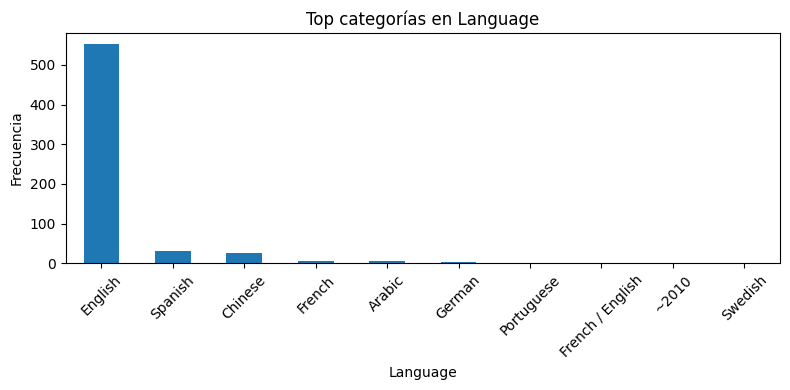

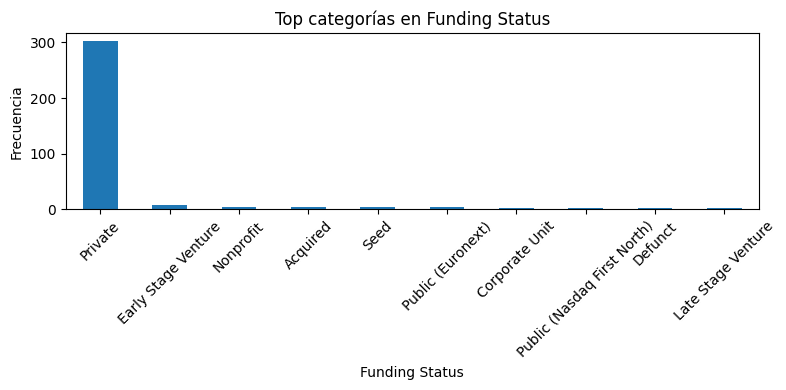

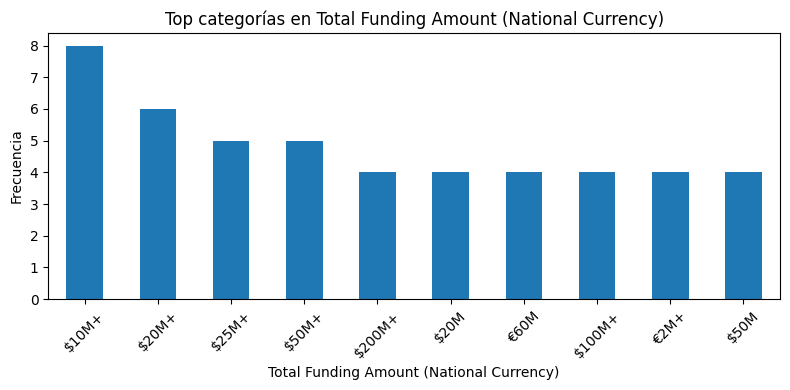

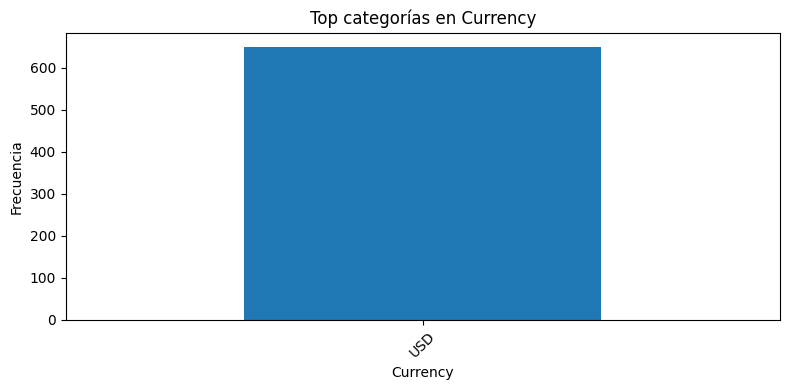

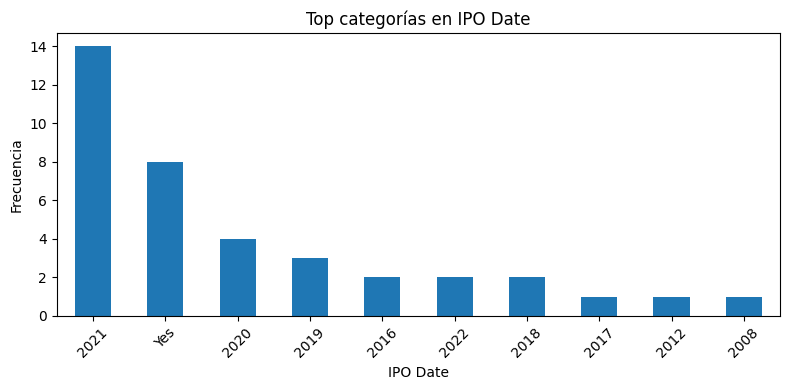

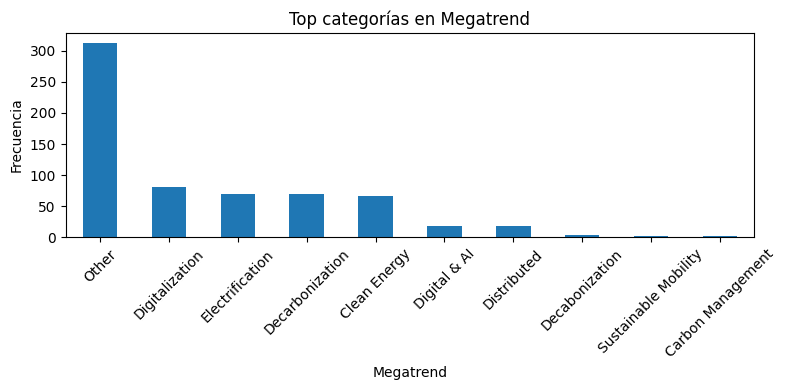

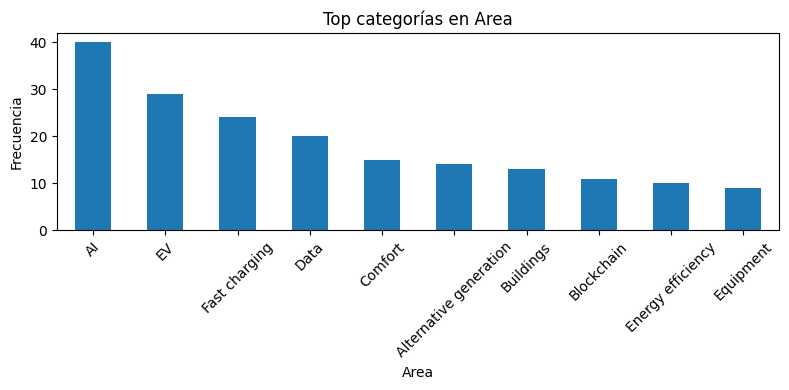

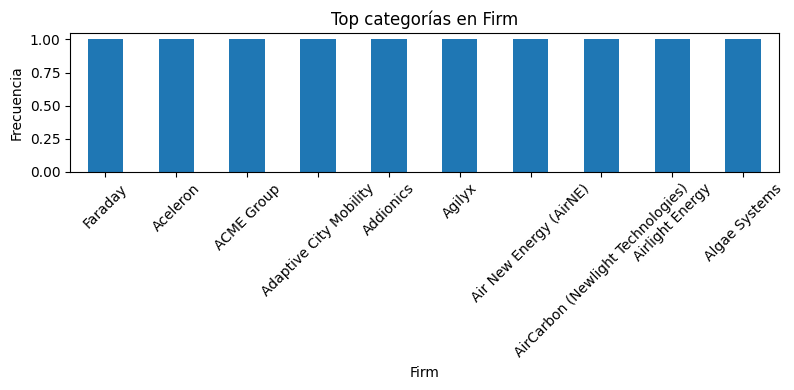

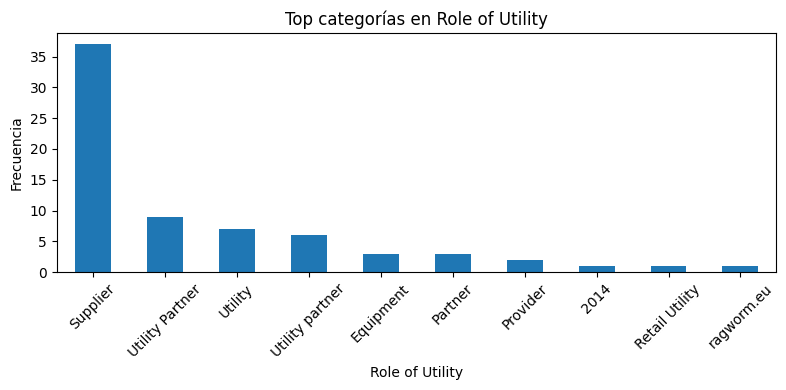

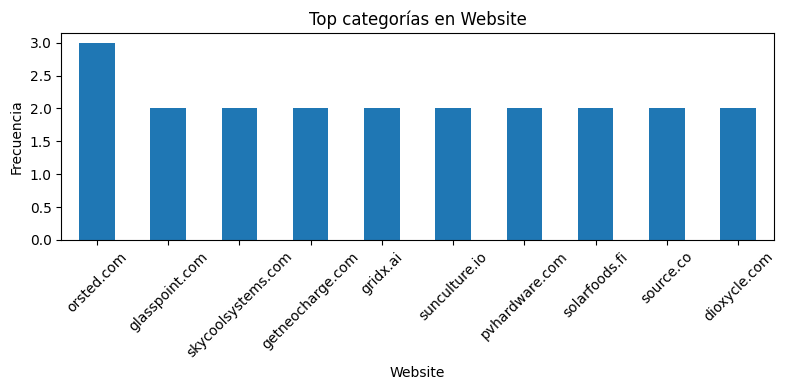

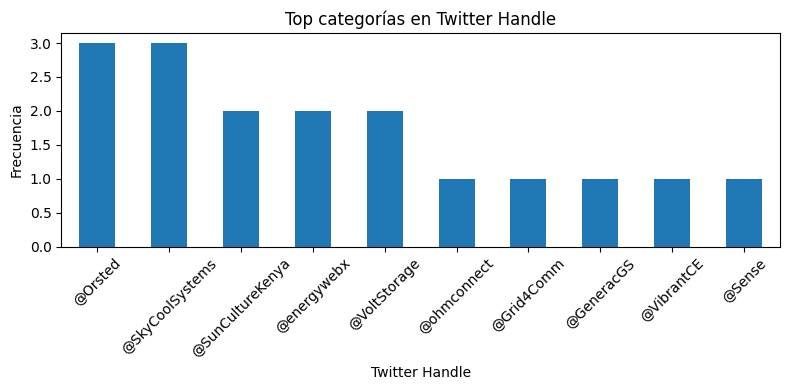

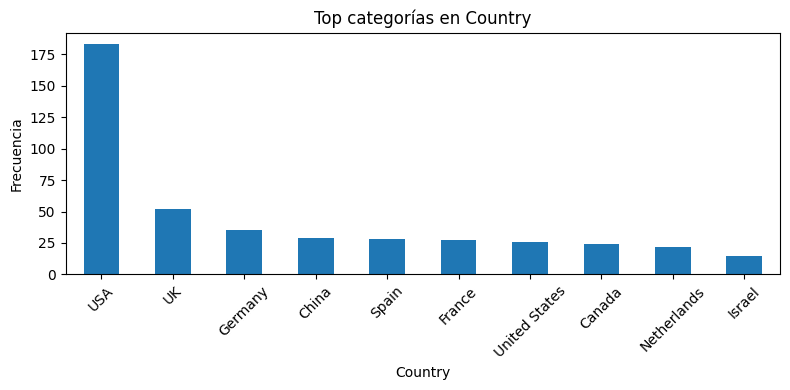

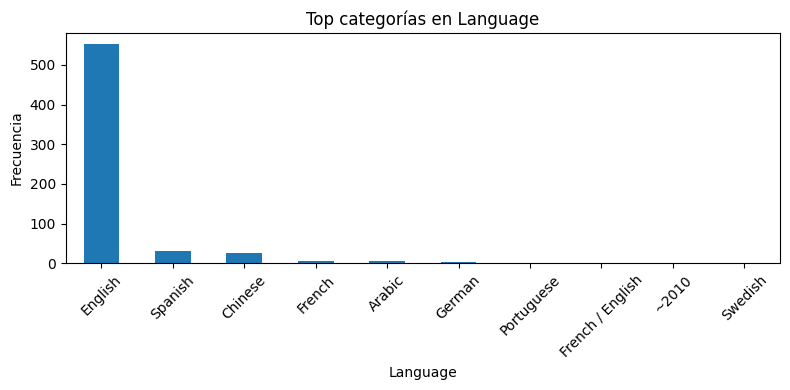

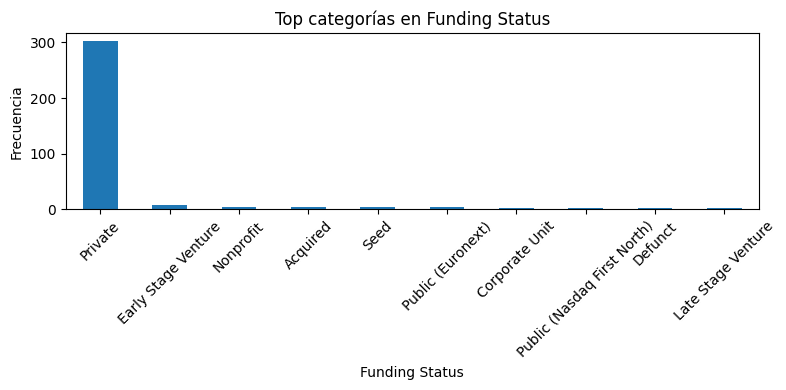

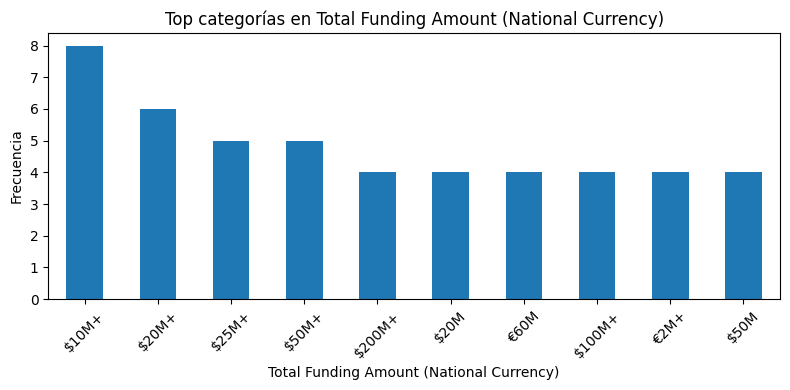

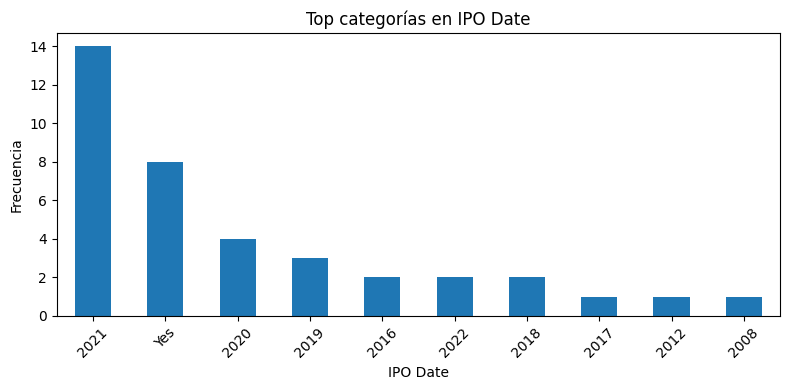

In [ ]:
# Gráficos de barras para variables categóricas (top 10 categorías)
for var in cat_vars:
    plt.figure(figsize=(8,4))
    df[var].value_counts().nlargest(10).plot(kind='bar')
    plt.title(f"Top categorías en {var}")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

omit = ['Short Description', 'Keywords', 'Currency']

for var in cat_vars:
    if var in omit:
        continue

    plt.figure(figsize=(8,4))
    df[var].value_counts().nlargest(10).plot(kind='bar')
    plt.title(f"Top categorías en {var}")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Análisis bi/multivariante

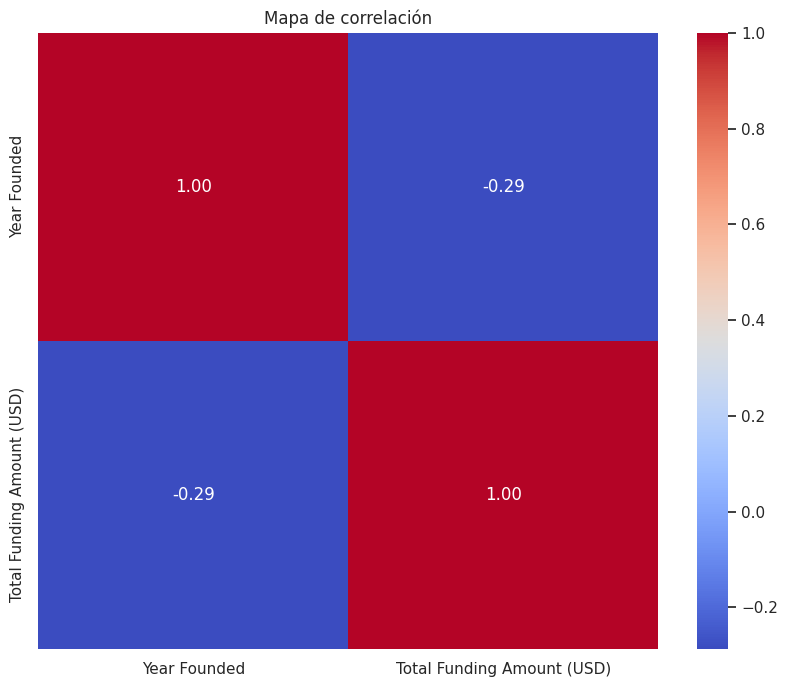

In [ ]:
# Mapa de correlación (sólo numéricas)
if num_vars:
    corr = df[num_vars].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Mapa de correlación")
    plt.show()

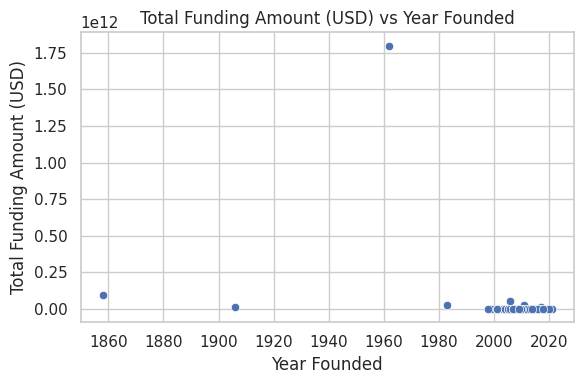

In [ ]:
# Scatterplot entre dos variables de interés
x_var = 'Year Founded'
y_var = 'Total Funding Amount (USD)'
if x_var in df.columns and y_var in df.columns:
    # Convertir a numérico si es necesario
    df[y_var] = pd.to_numeric(df[y_var], errors='coerce')
    df[x_var] = pd.to_numeric(df[x_var], errors='coerce')
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[x_var], y=df[y_var])
    plt.title(f"{y_var} vs {x_var}")
    plt.tight_layout()
    plt.show()

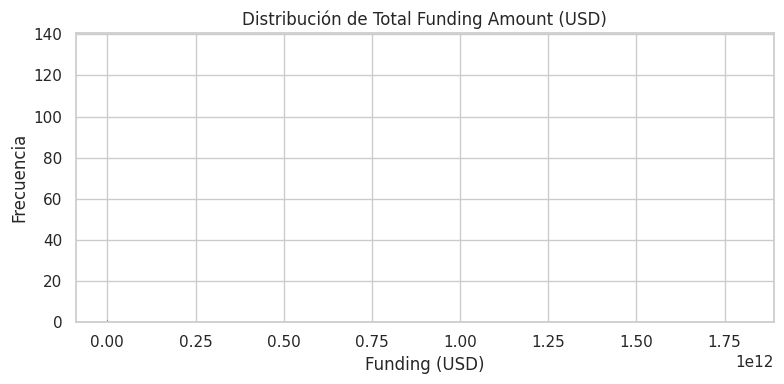

In [ ]:
# Generamos el Histograma de funding
threshold = df['Total Funding Amount (USD)'].quantile(0.95)
filtered_df = df[df['Total Funding Amount (USD)'] <= threshold]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(df['Total Funding Amount (USD)'].dropna(), kde=False)
plt.title('Distribución de Total Funding Amount (USD)')
plt.xlabel('Funding (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()

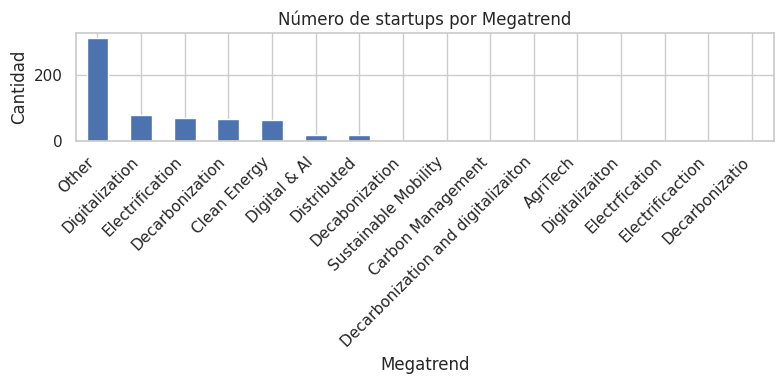

In [ ]:
# Conteo de startups por Megatrend

plt.figure(figsize=(8,4))
df['Megatrend'].value_counts().plot.bar()
plt.title('Número de startups por Megatrend')
plt.xlabel('Megatrend')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

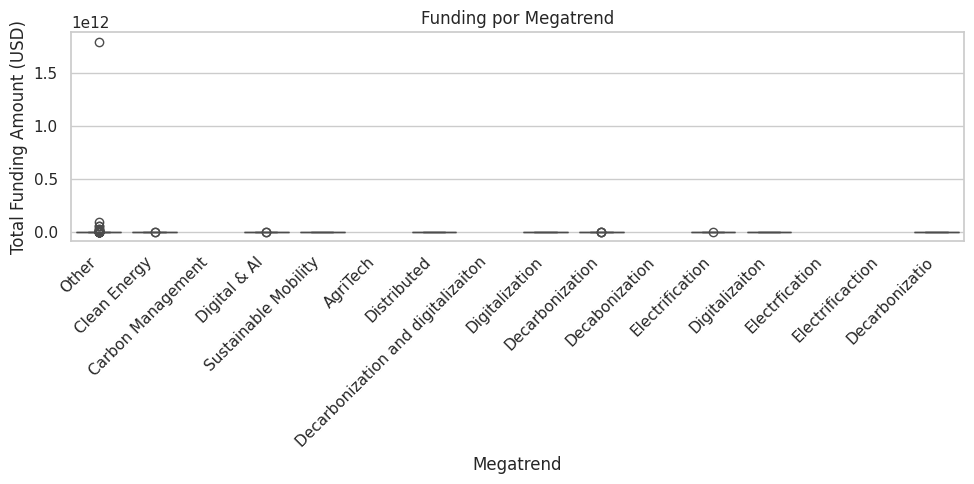

In [ ]:
# Boxplot de funding por Megatrend

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Megatrend', y='Total Funding Amount (USD)')
plt.title('Funding por Megatrend')
plt.xlabel('Megatrend')
plt.ylabel('Total Funding Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [ ]:
# Label Encoding de Megatrend

le = LabelEncoder()
df['Megatrend_le'] = le.fit_transform(df['Megatrend'].fillna('Unknown'))
print("Mapeo:", dict(zip(le.classes_, le.transform(le.classes_))))

Mapeo: {'AgriTech': np.int64(0), 'Carbon Management': np.int64(1), 'Clean Energy': np.int64(2), 'Decabonization': np.int64(3), 'Decarbonizatio': np.int64(4), 'Decarbonization': np.int64(5), 'Decarbonization and digitalizaiton': np.int64(6), 'Digital & AI': np.int64(7), 'Digitalizaiton': np.int64(8), 'Digitalization': np.int64(9), 'Distributed': np.int64(10), 'Electrfication': np.int64(11), 'Electrificaction': np.int64(12), 'Electrification': np.int64(13), 'Other': np.int64(14), 'Sustainable Mobility': np.int64(15)}


                            Total Funding Amount (USD)  Megatrend_le
Total Funding Amount (USD)                    1.000000      0.041384
Megatrend_le                                  0.041384      1.000000


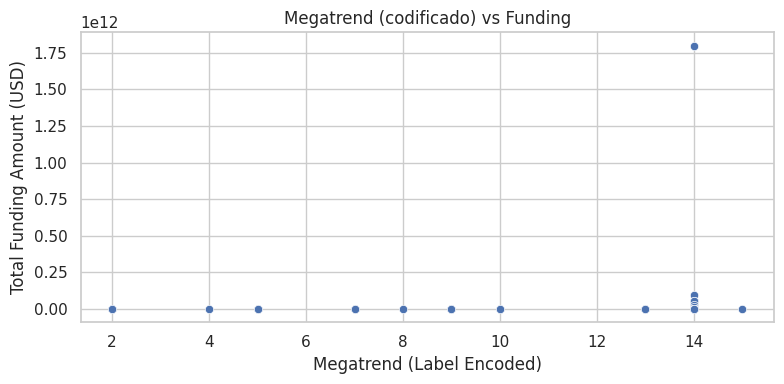

In [ ]:
# Correlación y scatter

corr = df[['Total Funding Amount (USD)','Megatrend_le']].corr()
print(corr)

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Megatrend_le', y='Total Funding Amount (USD)')
plt.title('Megatrend (codificado) vs Funding')
plt.xlabel('Megatrend (Label Encoded)')
plt.ylabel('Total Funding Amount (USD)')
plt.tight_layout()

In [ ]:
# Agregados por Megatrend

resumen = df.groupby('Megatrend')['Total Funding Amount (USD)'] \
    .agg(count='count', mean='mean', sum='sum') \
    .sort_values('sum', ascending=False)
print(resumen)

                                    count          mean           sum
Megatrend                                                            
Other                                 189  1.120599e+10  2.117933e+12
Clean Energy                           38  1.141368e+08  4.337200e+09
Digital & AI                            9  1.925667e+08  1.733100e+09
Decarbonization                        13  6.806463e+07  8.848402e+08
Sustainable Mobility                    1  5.000000e+08  5.000000e+08
Electrification                         5  5.347501e+07  2.673750e+08
Digitalization                          7  3.338928e+07  2.337249e+08
Distributed                             2  5.481603e+07  1.096321e+08
Digitalizaiton                          1  4.000000e+07  4.000000e+07
Decarbonizatio                          1  1.500000e+06  1.500000e+06
Carbon Management                       0           NaN  0.000000e+00
Decabonization                          0           NaN  0.000000e+00
Decarbonization and 